# Comparison of Original IForestASD, SADWIN IFA, PADWIN IFA, and NDKSWIN

L'objectif est de voir comment les 4 méthodes se comportent avec différents jeux de données.
* SAWIN IFA (Scores based ADWIN on IForestASD) utilise le score des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Ce score est utilisé par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* PAWIN IFA (Prediction based ADWIN on IForestASD) utilise la classification des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Cette classification est utilisée par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* NDKSWIN IFA (N-Dimensional KSWIN on IForestASD) utilise les données de la fenêtre courante pour détecter si elles drift sur au moins une colonne. NDKSWIN est une adaptation de KSWIN de scikit-multiflow pour les données à n dimensions. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [4]:
#************************ Execution settings *******************************
window_sizes = [50, 100, 250]
n_estimators = [20, 30]
#window_sizes = [50, 100]
#n_estimators = [20, 30]
#window = 100 # Number of sample in one window, window size.
#n_estimator = 30 # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 1000 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_save_size = 100
window_number = round((max_sample/window_save_size),0) # The number of window to save on .csv file

# Parameters for NDWSIN IFA
alpha=0.01
n_dimensions=2 # Number of dimensions to use for the test of the drift concept (normally 50% of m)
n_tested_samples=0.1 # Percentage of data to pick in the window to test the drift concept
fixed_checked_dimension = False # IF False, dimension will be choose randomly, if not on the 
fixed_checked_sample=False

## Execution Function

In [5]:
def execute_comparision():
    for window in window_sizes:
        for n_estimator in n_estimators:
            print("")
            print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
            func.run_IForestASDs_comparison(execution_number=execution_number, stream=stream, stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                             #n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly,
                            alpha=alpha, n_dimensions=n_dimensions, n_tested_samples=n_tested_samples,
                            fixed_checked_dimension = fixed_checked_dimension, fixed_checked_sample=fixed_checked_sample)
    
    directory_path = 'results/'+str(test_name)
    func.merge_file2(folder_path=directory_path, output_file = 'output.csv',skiprows=(4 + 4))

## Applied On Simple Stream Dataset
### Idea and waitting results
### Results
#### Model updating
#### Method performances

### Summary


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


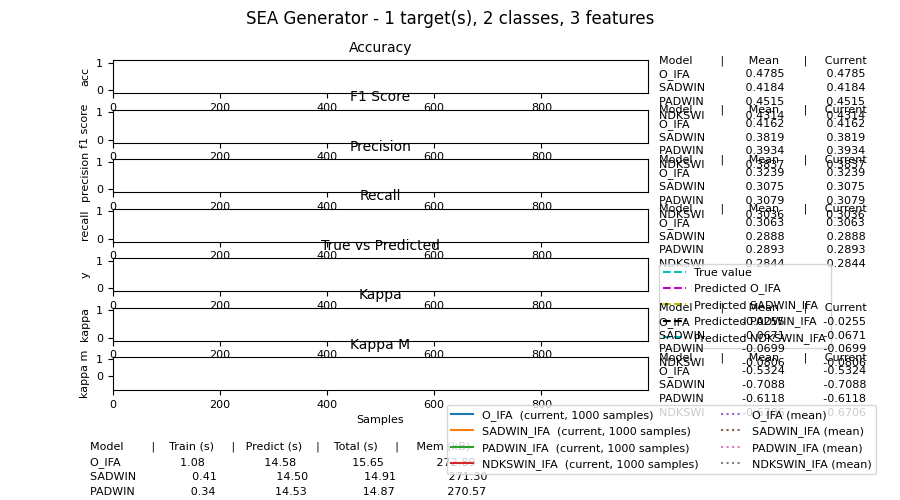

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.73s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [7.08s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [10.54s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [13.68s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [16.77s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [19.82s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [22.73s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #########----------- [45%] [25.73s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [28.82s]


<IPython.core.display.Javascript object>


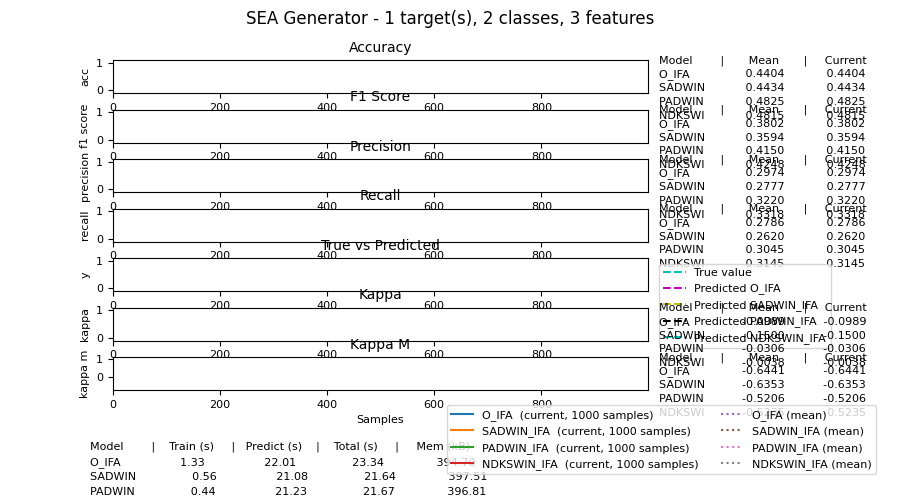

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [5.01s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [9.82s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [14.36s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [19.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [23.80s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [28.64s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [33.46s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [38.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [42.51s]
The model was updated by training a new iForest with the version : AnomalyRa

<IPython.core.display.Javascript object>


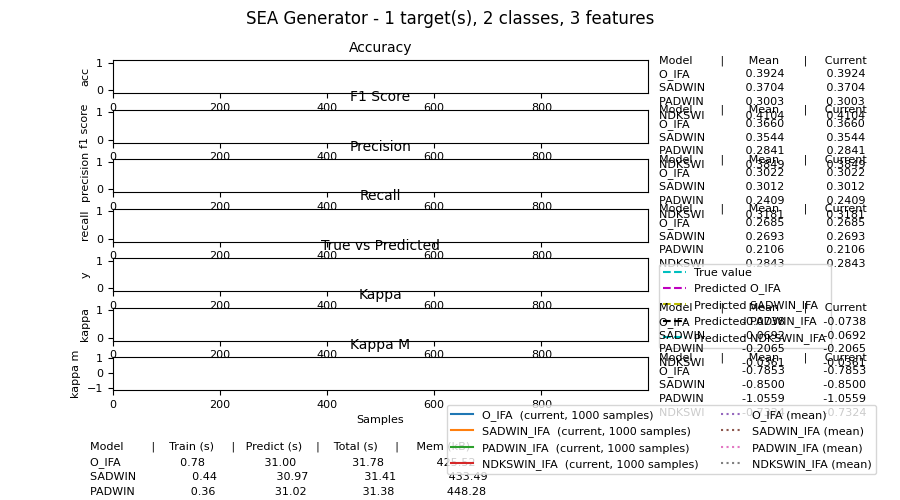

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [15.28s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [29.85s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [44.53s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [58.63s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [72.50s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [86.36s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [99.48s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [112.44s]
The model was updated by training a new iForest with the version : Anomaly

<IPython.core.display.Javascript object>


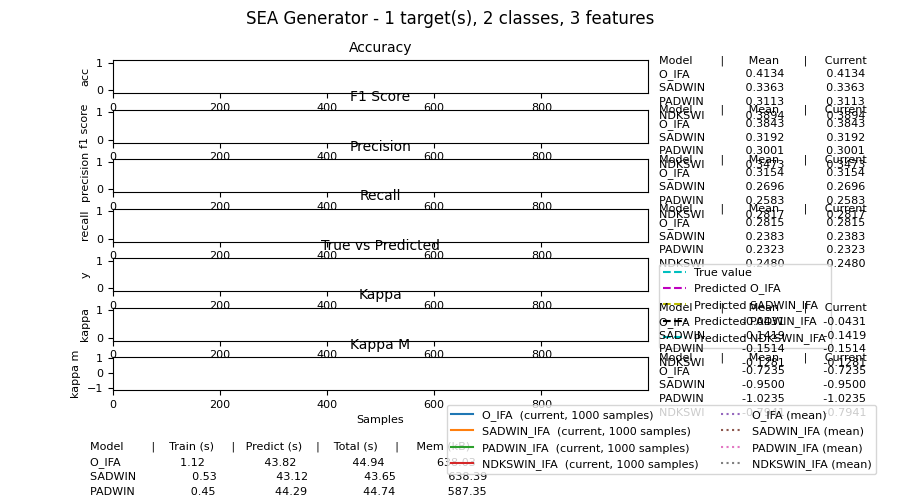

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [19.37s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [38.41s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [57.27s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [77.63s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [98.48s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [118.62s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [138.99s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [158.01s]
The model was updated by training a new iForest with the version : Anoma

<IPython.core.display.Javascript object>


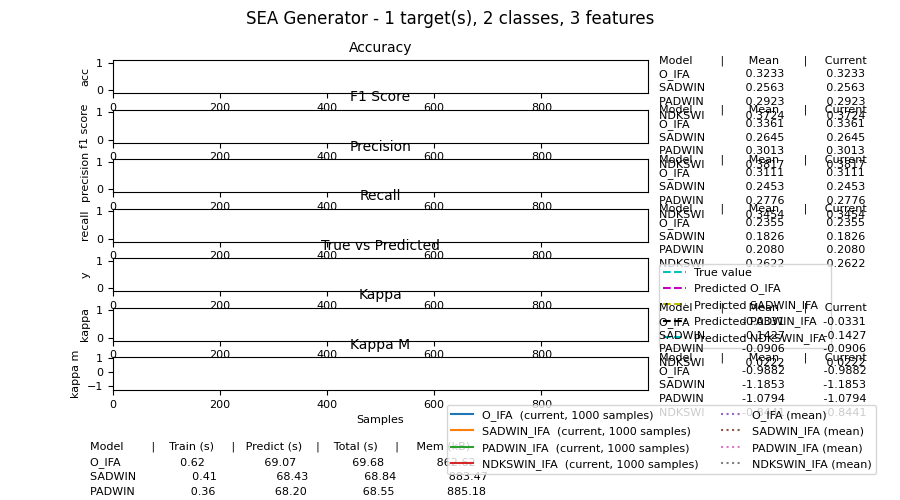

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [92.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [182.91s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [276.04s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3233
O_IFA - Kappa        : -0.0331
O_IFA - Kappa M      : -0.9882
O_IFA - Precision: 0.3111
O_IFA - Recall: 0.2355
O_IFA - F1 score: 0.3361
O_IFA - Training time (s)  : 0.62
O_IFA - Testing time  (s)  : 69.07
O_IFA - Total time    (s)  : 69.68
O_IFA - Size (kB)          : 862.6162
SADWIN_IFA - Accuracy     : 0.2563
SADWIN_IFA - Kappa        : -0.1427
SADWIN_IFA - Kappa M      : -1.1853
SADWIN_IFA - Precision: 0.2453
SADWIN_IFA - Recall: 0.1826
SADWIN_IFA - F1 score: 0.2645
SADWIN_IFA - Training time (s)  : 0.41
SADWIN_IFA - Testing time  (s)  : 68.43
SADWIN_IFA - Total time    

<IPython.core.display.Javascript object>


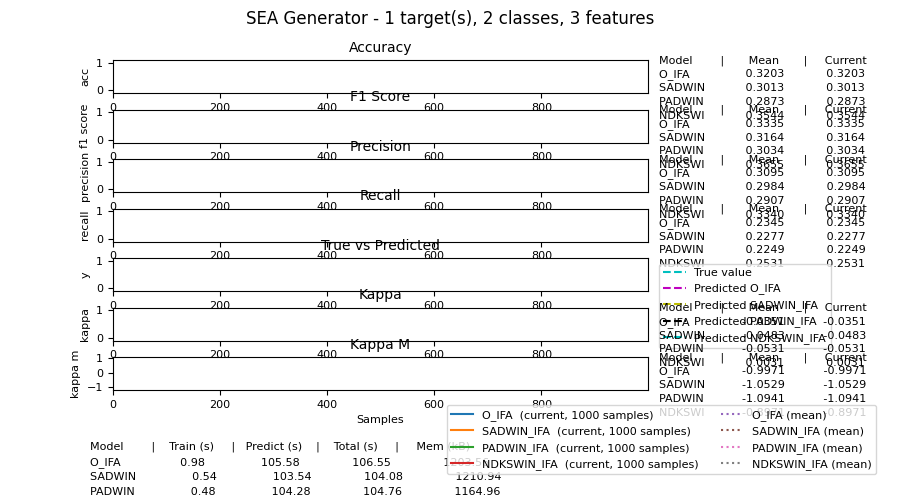

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [134.37s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [267.24s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [417.68s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3203
O_IFA - Kappa        : -0.0351
O_IFA - Kappa M      : -0.9971
O_IFA - Precision: 0.3095
O_IFA - Recall: 0.2345
O_IFA - F1 score: 0.3335
O_IFA - Training time (s)  : 0.98
O_IFA - Testing time  (s)  : 105.58
O_IFA - Total time    (s)  : 106.55
O_IFA - Size (kB)          : 1203.5576
SADWIN_IFA - Accuracy     : 0.3013
SADWIN_IFA - Kappa        : -0.0483
SADWIN_IFA - Kappa M      : -1.0529
SADWIN_IFA - Precision: 0.2984
SADWIN_IFA - Recall: 0.2277
SADWIN_IFA - F1 score: 0.3164
SADWIN_IFA - Training time (s)  : 0.54
SADWIN_IFA - Testing time  (s)  : 103.54
SADWIN_IFA - Total tim

In [6]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Stream data containning anomalies
### Idea and waitting results
The idea of using a stream data with anomalies and without drift is to test both methods on a anomaly environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances

### Summary

1000

******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


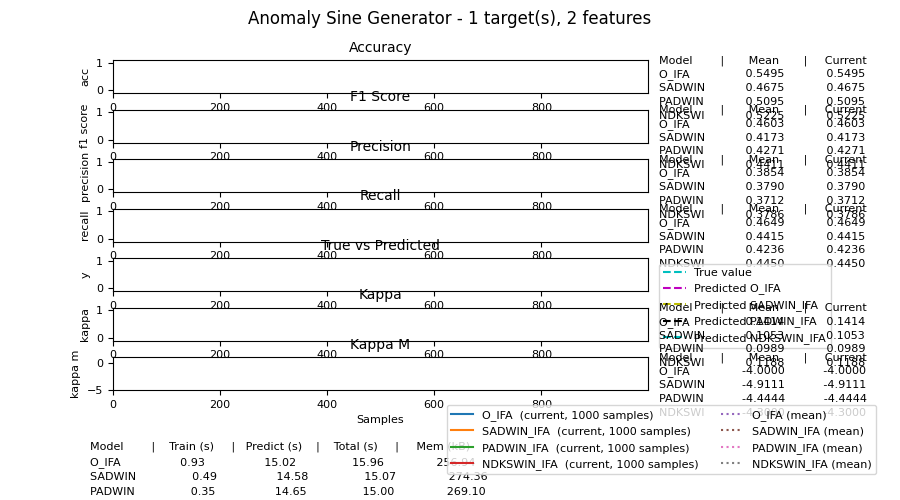

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.10s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.47s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [12.34s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [15.87s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [19.11s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #########----------- [45%] [28.90s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [32.00s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###########--------- [55%] [35.04s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [38.18s]


<IPython.core.display.Javascript object>


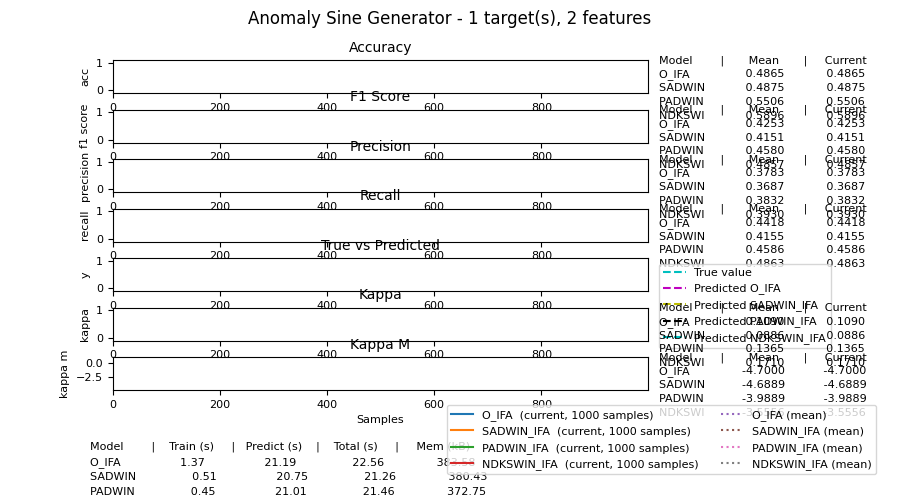

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.53s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.95s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [16.55s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [21.59s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [26.63s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [31.20s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [35.59s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [40.02s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [44.62s]
The model was updated by training a new iForest with the version : AnomalyRa

<IPython.core.display.Javascript object>


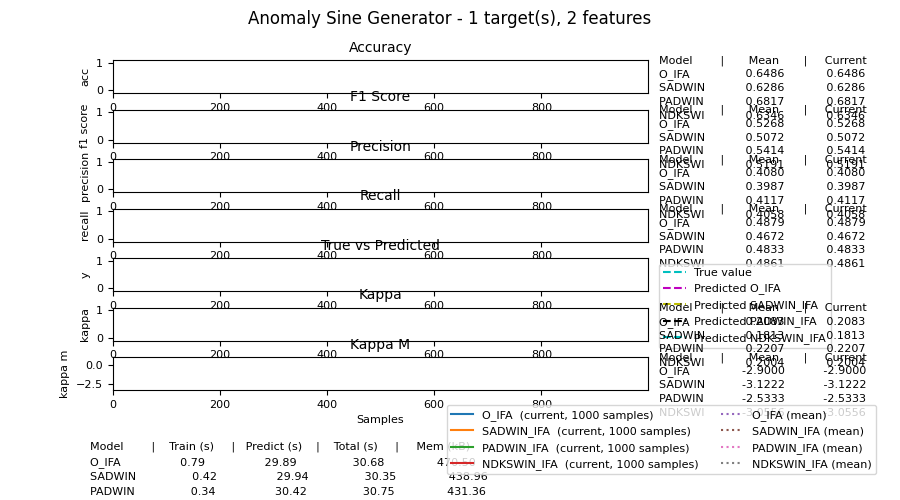

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ######-------------- [30%] [27.24s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [54.02s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [67.68s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [81.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [94.78s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [108.24s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [121.62s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6486
O_IFA - Kappa        : 0.2083
O_IFA - Kappa M      : -2.9000
O_IFA - Precision: 0.4080
O_IFA - Recall: 0.4879
O_IFA 

<IPython.core.display.Javascript object>


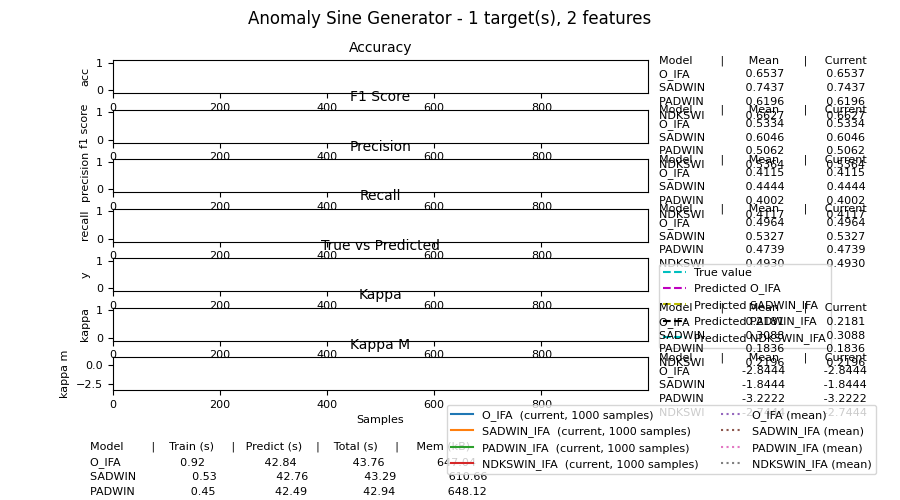

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ######-------------- [30%] [38.76s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [77.25s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [96.29s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [115.65s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [134.83s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [154.04s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [172.85s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6537
O_IFA - Kappa        : 0.2181
O_IFA - Kappa M      : -2.8444
O_IFA - Precision: 0.4115
O_IFA - Recall: 0.4964
O_IF

<IPython.core.display.Javascript object>


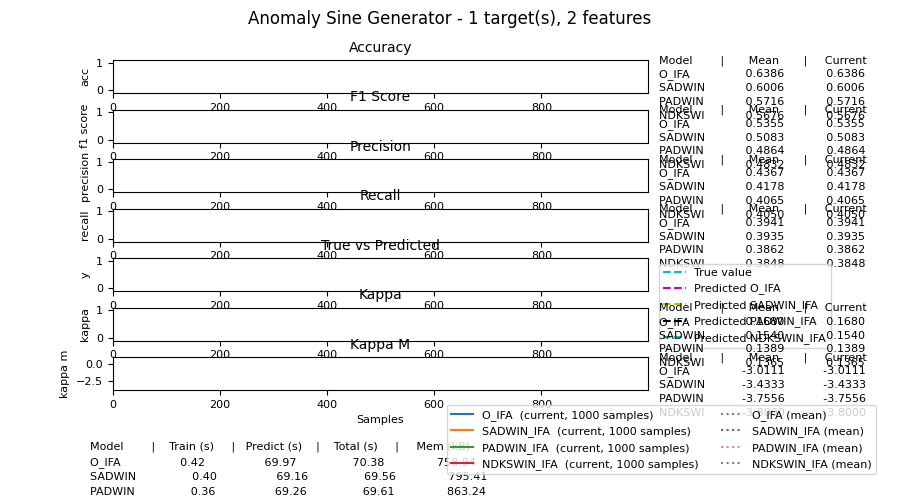

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 #################### [100%] [279.02s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6386
O_IFA - Kappa        : 0.1680
O_IFA - Kappa M      : -3.0111
O_IFA - Precision: 0.4367
O_IFA - Recall: 0.3941
O_IFA - F1 score: 0.5355
O_IFA - Training time (s)  : 0.42
O_IFA - Testing time  (s)  : 69.97
O_IFA - Total time    (s)  : 70.38
O_IFA - Size (kB)          : 758.9443
SADWIN_IFA - Accuracy     : 0.6006
SADWIN_IFA - Kappa        : 0.1540
SADWIN_IFA - Kappa M      : -3.4333
SADWIN_IFA - Precision: 0.4178
SADWIN_IFA - Recall: 0.3935
SADWIN_IFA - F1 score: 0.5083
SADWIN_IFA - Training time (s)  : 0.40
SADWIN_IFA - Testing time  (s)  : 69.16
SADWIN_IFA - Total time    (s)  : 69.56
SADWIN_IFA - Size (kB)          : 795.4072
PADWIN_IFA - Accuracy     : 0.5716
PADWIN_IFA - Kappa        : 0.1389
PADWIN_IFA - Kappa M      : -3.7556
PADWIN_IFA - Precision: 0.4065
PADWIN_IFA - Recall: 0.3862
PADWIN_IFA - F1 score: 0.4864
PADWIN_IFA - Training time (s)  : 0.36
PADWIN_IFA - Testing 

<IPython.core.display.Javascript object>


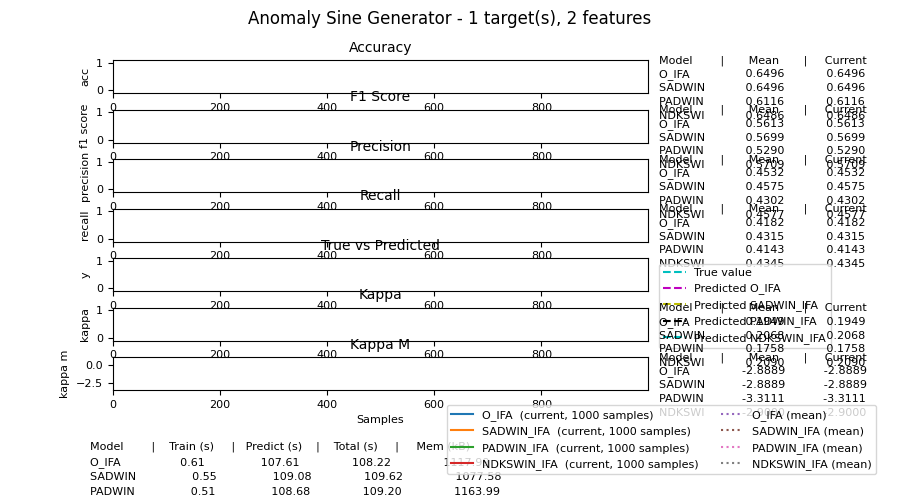

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###############----- [75%] [290.21s]
The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [436.15s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6496
O_IFA - Kappa        : 0.1949
O_IFA - Kappa M      : -2.8889
O_IFA - Precision: 0.4532
O_IFA - Recall: 0.4182
O_IFA - F1 score: 0.5613
O_IFA - Training time (s)  : 0.61
O_IFA - Testing time  (s)  : 107.61
O_IFA - Total time    (s)  : 108.22
O_IFA - Size (kB)          : 1117.9873
SADWIN_IFA - Accuracy     : 0.6496
SADWIN_IFA - Kappa        : 0.2068
SADWIN_IFA - Kappa M      : -2.8889
SADWIN_IFA - Precision: 0.4575
SADWIN_IFA - Recall: 0.4315
SADWIN_IFA - F1 score: 0.5699
SADWIN_IFA - Training time (s)  : 0.55
SADWIN_IFA - Testing time  (s)  : 109.08
SADWIN_IFA - Total time    (s)  : 109.62
SADWIN_IFA - Size (kB)          : 1077.5791
PADWIN_IFA - Accuracy     : 0.6116
PADWIN_IFA - Kappa        : 0.1758
PADWIN_IFA - Kappa M      : -3.3111
PADWIN_IFA - Precision: 0.4302

In [7]:
dataset_name = "AnomalySineGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
n_samples=10000
anomalies_percentage = 0.1
n_anomalies= int(n_samples*anomalies_percentage)
print(str(n_anomalies))
stream = func.get_anomalies_data_generated(n_samples=n_samples, n_anomalies=n_anomalies, contextual=False,
                 n_contextual=0.0, shift=4, noise=0.1, replace=True, random_state=None)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Simple ConceptDrift Stream Dataset

### When drift start one window and is in the window


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


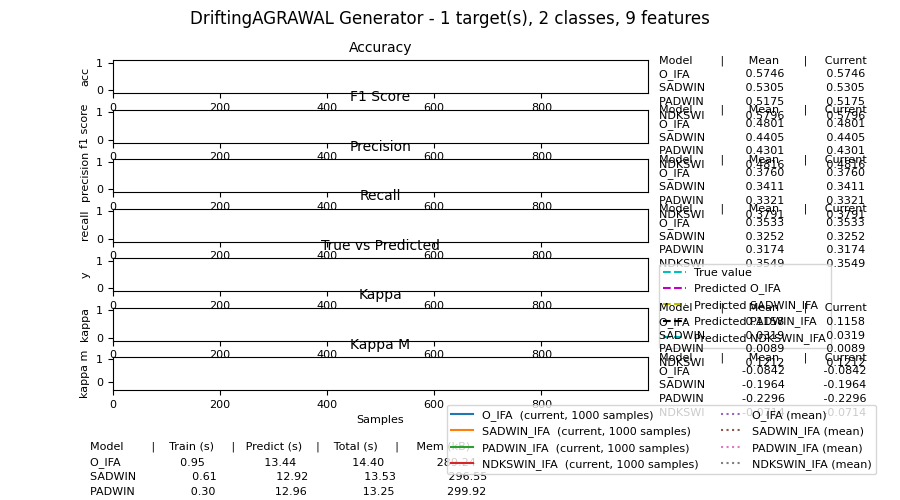

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.21s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ###----------------- [15%] [6.31s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [9.25s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [12.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [14.98s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [17.79s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [20.64s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [23.45s]
The model was updated by training a new iFo

<IPython.core.display.Javascript object>


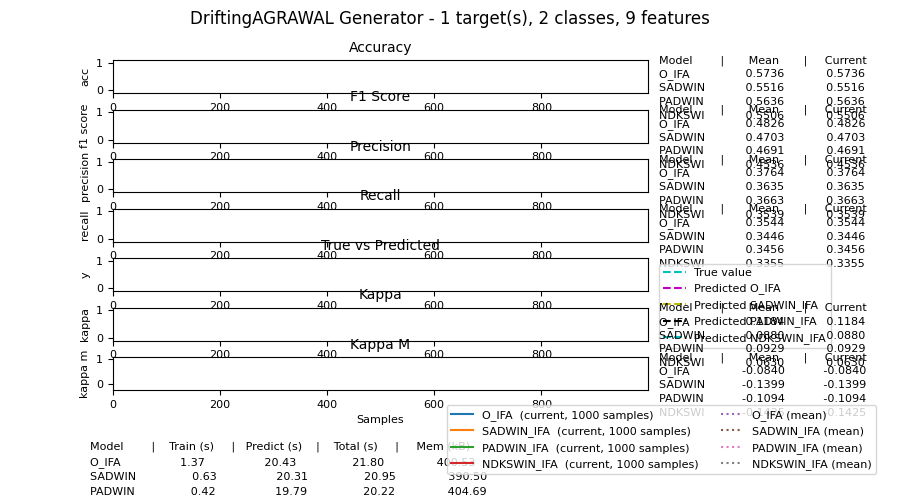

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.34s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [12.58s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [16.62s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [20.57s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #######------------- [35%] [24.90s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [29.92s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ###

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5556: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  RuntimeWarning)


 ##########---------- [50%] [40.60s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###########--------- [55%] [45.28s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [49.91s]
The model was updated by training a new iForest with the version : AnomalyRate
 #############------- [65%] [54.02s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [58.26s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [62.45s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [66.77s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################--- [85%] [70.84s]
The model was updated by training a new iForest with the version : AnomalyR

<IPython.core.display.Javascript object>


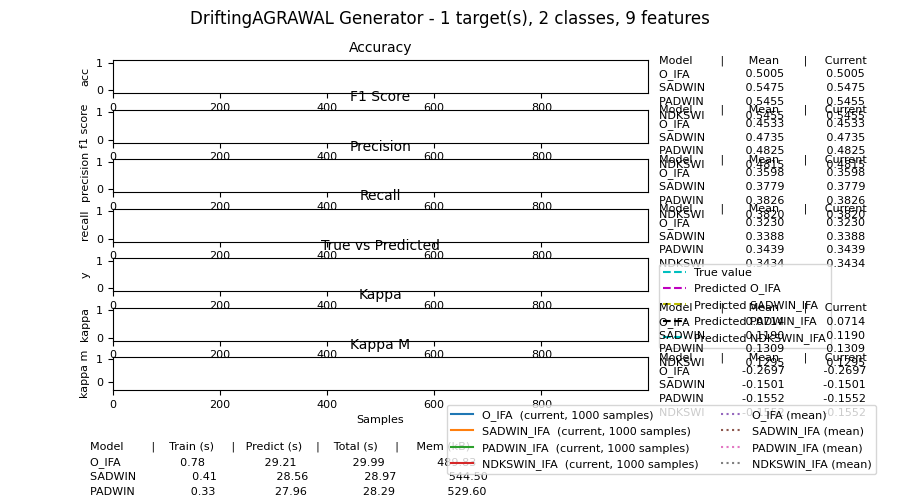

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [13.00s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [25.41s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [39.44s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [51.98s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [64.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [77.22s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [89.96s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [103.36s]
The model was updated by training a new iForest with the version : Anomaly

<IPython.core.display.Javascript object>


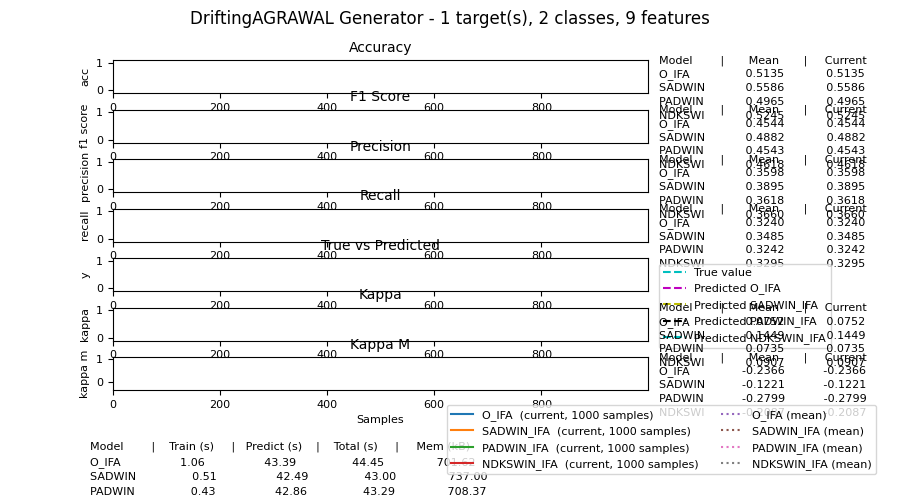

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [19.22s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [37.45s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [56.60s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [74.99s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [94.44s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [113.76s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [133.54s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [152.45s]
The model was updated by training a new iForest with the version : Anoma

<IPython.core.display.Javascript object>


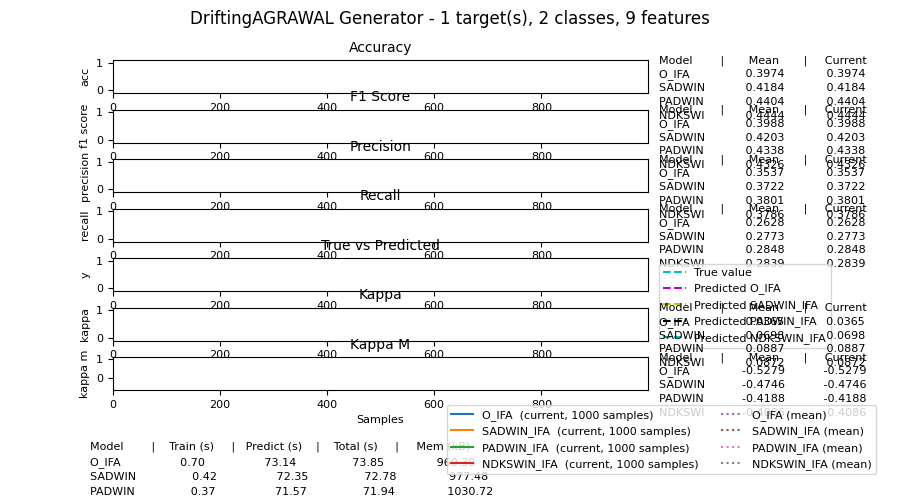

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [108.37s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [202.29s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [290.04s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3974
O_IFA - Kappa        : 0.0365
O_IFA - Kappa M      : -0.5279
O_IFA - Precision: 0.3537
O_IFA - Recall: 0.2628
O_IFA - F1 score: 0.3988
O_IFA - Training time (s)  : 0.70
O_IFA - Testing time  (s)  : 73.14
O_IFA - Total time    (s)  : 73.85
O_IFA - Size (kB)          : 960.2959
SADWIN_IFA - Accuracy     : 0.4184
SADWIN_IFA - Kappa        : 0.0698
SADWIN_IFA - Kappa M      : -0.4746
SADWIN_IFA - Precision: 0.3722
SADWIN_IFA - Recall: 0.2773
SADWIN_IFA - F1 score: 0.4203
SADWIN_IFA - Training time (s)  : 0.42
SADWIN_IFA - Testing time  (s)  : 72.35
SADWIN_IFA - Total time    (s)  : 72.78
SADWIN_IFA - Size (kB)          : 977.4814
PADWIN_IFA - Accuracy

<IPython.core.display.Javascript object>


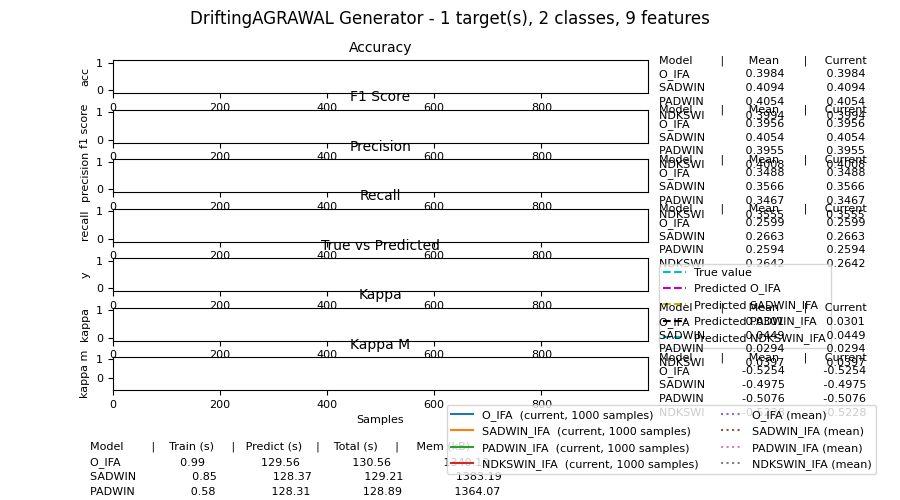

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.12s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [158.69s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [338.55s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5556: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  RuntimeWarning)


 #################### [100%] [517.78s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3984
O_IFA - Kappa        : 0.0301
O_IFA - Kappa M      : -0.5254
O_IFA - Precision: 0.3488
O_IFA - Recall: 0.2599
O_IFA - F1 score: 0.3956
O_IFA - Training time (s)  : 0.99
O_IFA - Testing time  (s)  : 129.56
O_IFA - Total time    (s)  : 130.56
O_IFA - Size (kB)          : 1340.1318
SADWIN_IFA - Accuracy     : 0.4094
SADWIN_IFA - Kappa        : 0.0449
SADWIN_IFA - Kappa M      : -0.4975
SADWIN_IFA - Precision: 0.3566
SADWIN_IFA - Recall: 0.2663
SADWIN_IFA - F1 score: 0.4054
SADWIN_IFA - Training time (s)  : 0.85
SADWIN_IFA - Testing time  (s)  : 128.37
SADWIN_IFA - Total time    (s)  : 129.21
SADWIN_IFA - Size (kB)          : 1383.1885
PADWIN_IFA - Accuracy     : 0.4054
PADWIN_IFA - Kappa        : 0.0294
PADWIN_IFA - Kappa M      : -0.5076
PADWIN_IFA - Precision: 0.3467
PADWIN_IFA - Recall: 0.2594
PADWIN_IFA - F1 score: 0.3955
PADWIN_IFA - Training time (s)  : 0.58
PADWIN_IFA - Te

In [8]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 5, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 100, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift is in one window and don't start the window


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


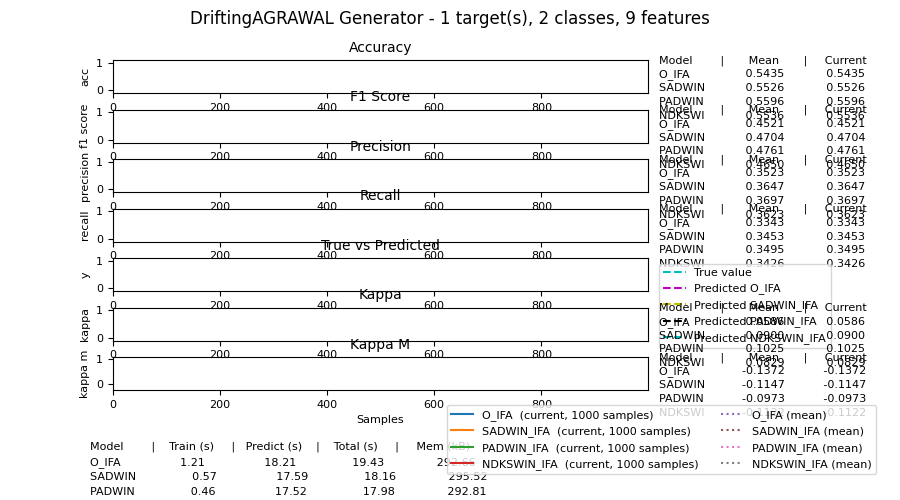

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.32s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.26s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [12.12s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [15.94s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [19.80s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #######------------- [35%] [23.58s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [27.31s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [31.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [34.83s]
Th

<IPython.core.display.Javascript object>


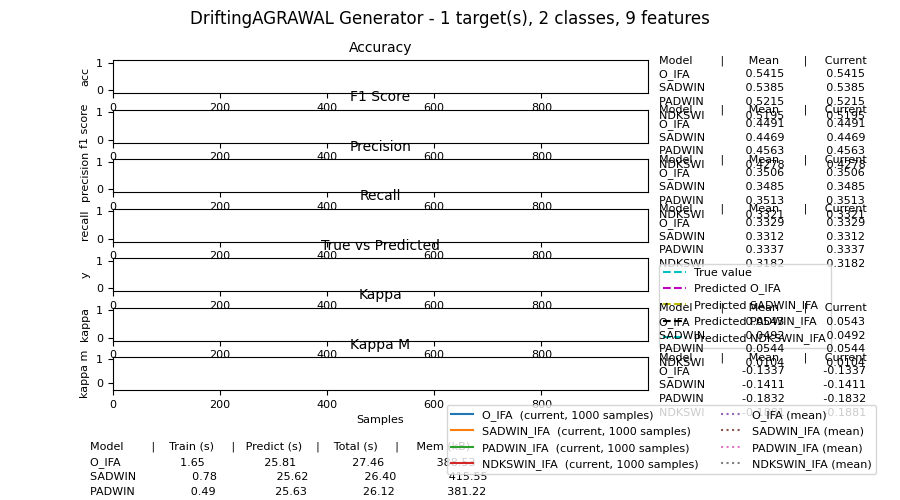

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [5.87s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [11.76s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [17.36s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [23.08s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [28.45s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #######------------- [35%] [34.06s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [39.63s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ##

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=(9, 5))


<IPython.core.display.Javascript object>


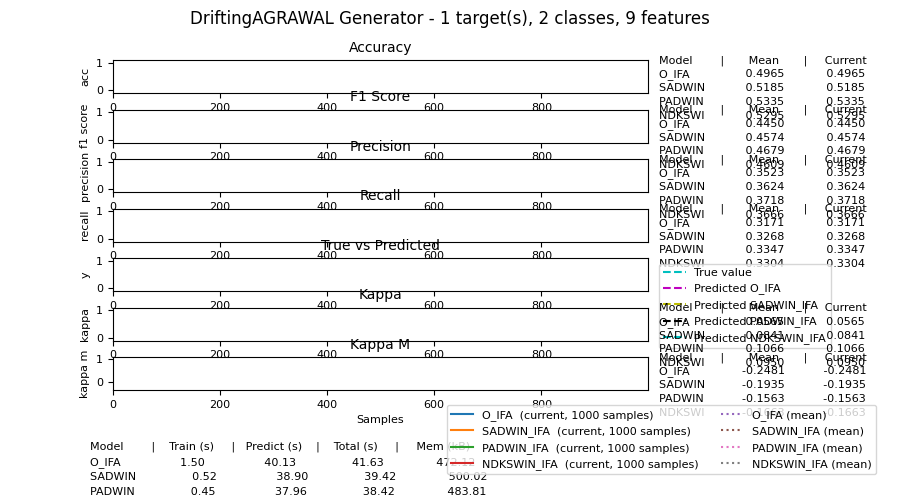

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [19.75s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [37.76s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [54.70s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [71.82s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [88.57s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [105.91s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [123.63s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [141.14s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : N

<IPython.core.display.Javascript object>


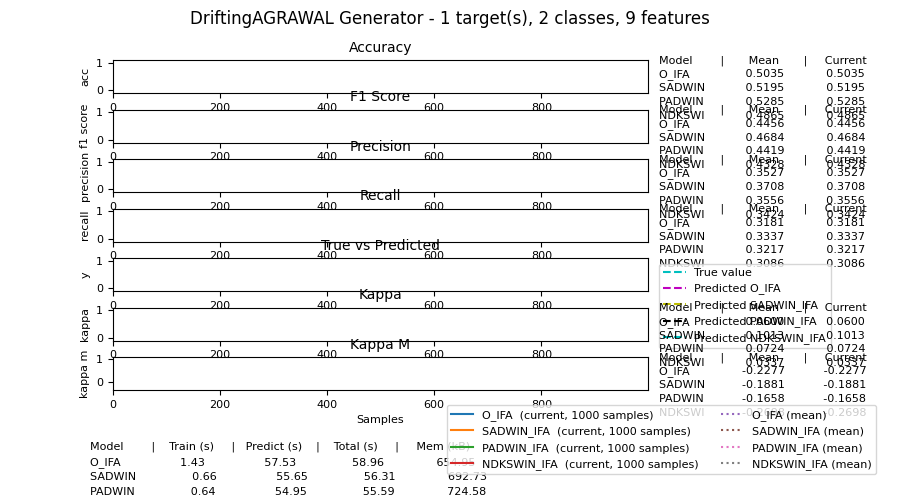

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.07s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [25.12s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [49.51s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [73.80s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [99.44s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [125.83s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [152.22s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [176.56s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [201.92s]
The model was updated by training a new iForest with the version : Anom

<IPython.core.display.Javascript object>


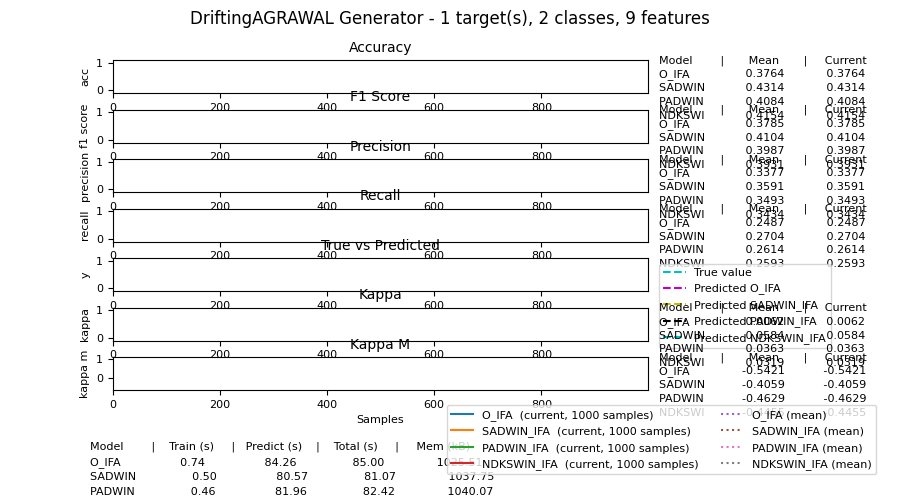

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.20s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [124.48s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [228.61s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [333.04s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3764
O_IFA - Kappa        : 0.0062
O_IFA - Kappa M      : -0.5421
O_IFA - Precision: 0.3377
O_IFA - Recall: 0.2487
O_IFA - F1 score: 0.3785
O_IFA - Training time (s)  : 0.74
O_IFA - Testing time  (s)  : 84.26
O_IFA - Total time    (s)  : 85.00
O_IFA - Size (kB)          : 1025.5107
SADWIN_IFA - Accuracy     : 0.4314
SADWIN_IFA - Kappa        : 0.0584
SADWIN_IFA - Kappa M      : -0.4059
SADWIN_IFA - Precision: 0.3591
SADWIN_IFA - Recall: 0.2704
SADWIN_IFA - F1 score: 0.4104
SADWIN_IFA - Training time (s)  : 0.50
SADWIN_IFA - Testing time  (s)  : 80.57
SADWIN_IFA - Total time    (s)  : 81.07
SADWIN_IFA - Size (kB)          : 1037.7510
PADWIN_IFA - Accura

<IPython.core.display.Javascript object>


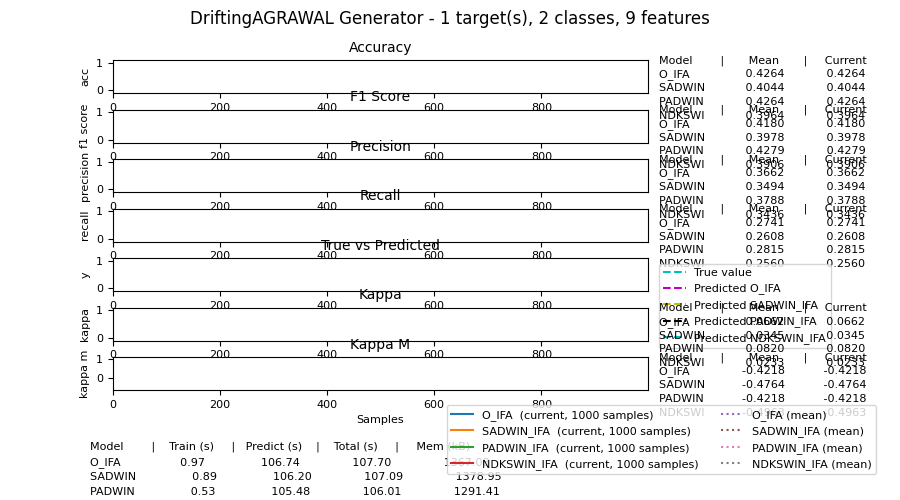

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.13s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [150.36s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [292.45s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [428.19s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4264
O_IFA - Kappa        : 0.0662
O_IFA - Kappa M      : -0.4218
O_IFA - Precision: 0.3662
O_IFA - Recall: 0.2741
O_IFA - F1 score: 0.4180
O_IFA - Training time (s)  : 0.97
O_IFA - Testing time  (s)  : 106.74
O_IFA - Total time    (s)  : 107.70
O_IFA - Size (kB)          : 1367.0850
SADWIN_IFA - Accuracy     : 0.4044
SADWIN_IFA - Kappa        : 0.0345
SADWIN_IFA - Kappa M      : -0.4764
SADWIN_IFA - Precision: 0.3494
SADWIN_IFA - Recall: 0.2608
SADWIN_IFA - F1 score: 0.3978
SADWIN_IFA - Training time (s)  : 0.89
SADWIN_IFA - Testing time  (s)  : 106.20
SADWIN_IFA - Total time 

In [9]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 110, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift don't start a window but is between two windows


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


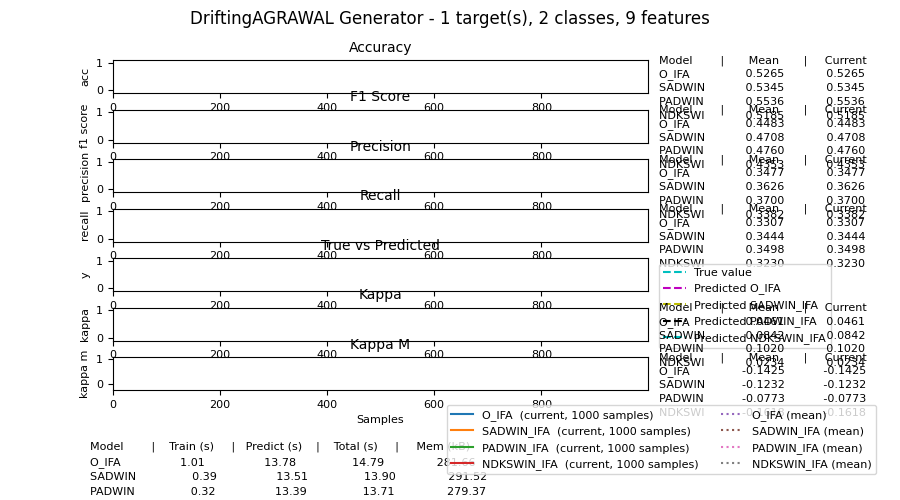

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.17s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [6.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [8.99s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [11.97s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [14.87s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [17.80s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [20.68s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [23.80s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [26.66s]
The model was updated by training a new iForest with the version : AnomalyRat

<IPython.core.display.Javascript object>


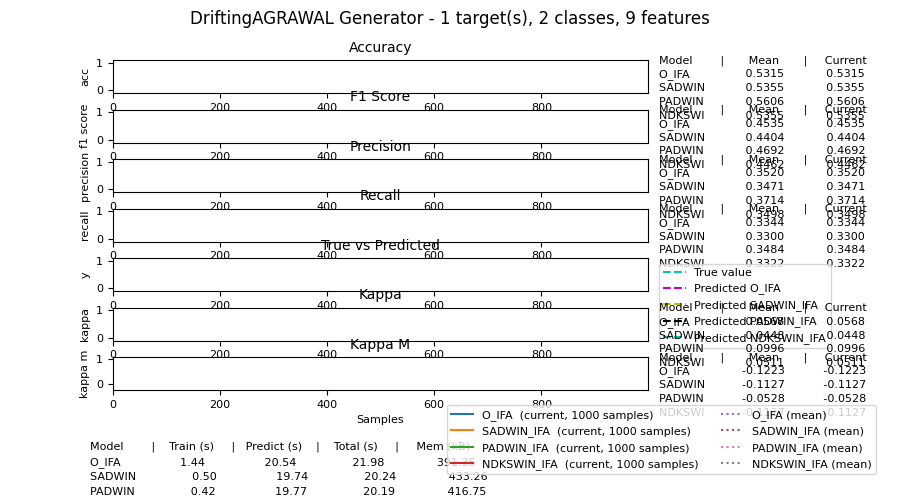

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.56s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [9.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [13.46s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [17.68s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [21.88s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [26.29s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [30.81s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [35.11s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [39.52s]
The model was updated by training a new iForest with the version : AnomalyRa

<IPython.core.display.Javascript object>


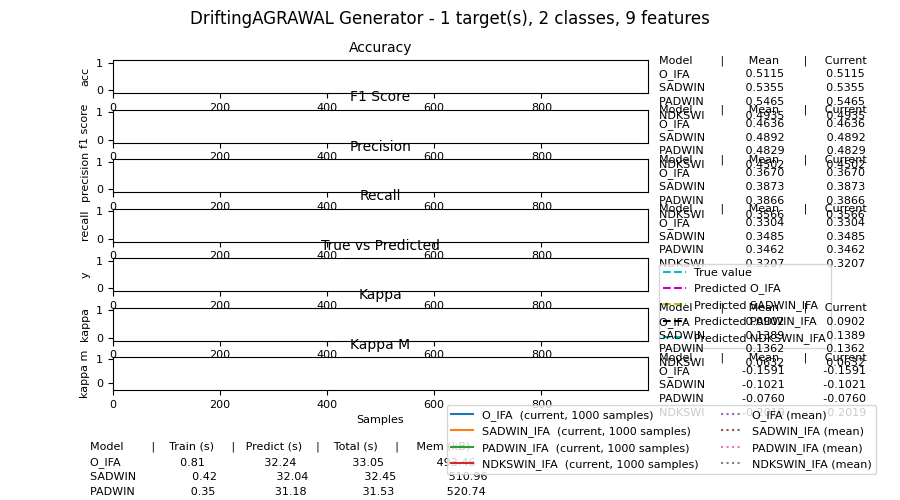

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [13.23s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [27.47s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [41.34s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [55.33s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [69.58s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [84.43s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [99.83s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [114.79s]
The model was updated by training a new iForest with the version : Anomaly

<IPython.core.display.Javascript object>


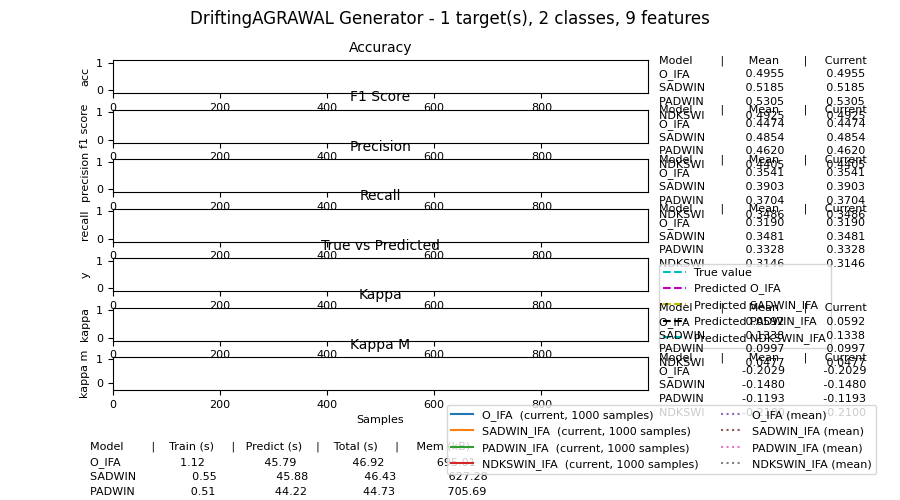

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [21.86s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [43.32s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [63.52s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [83.72s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [103.17s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [123.42s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [144.19s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [164.37s]
The model was updated by training a new iForest with the version : Anom

<IPython.core.display.Javascript object>


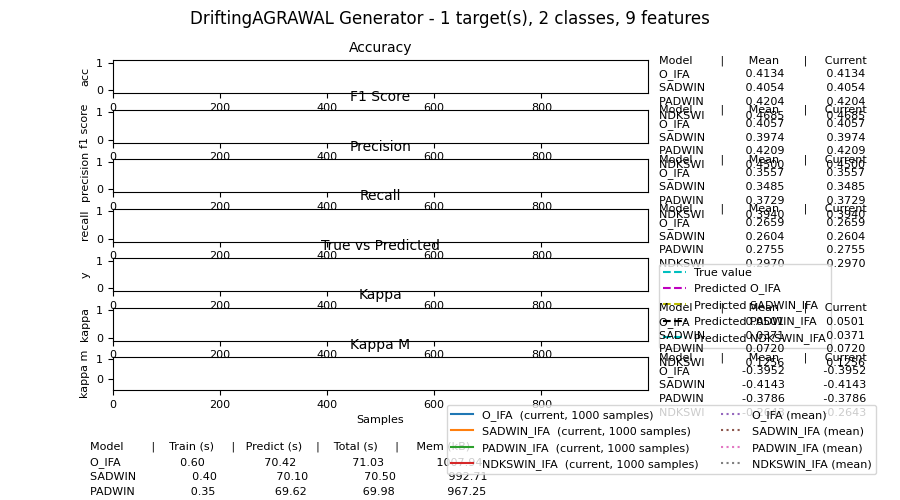

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [91.38s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [186.91s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [281.22s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4134
O_IFA - Kappa        : 0.0501
O_IFA - Kappa M      : -0.3952
O_IFA - Precision: 0.3557
O_IFA - Recall: 0.2659
O_IFA - F1 score: 0.4057
O_IFA - Training time (s)  : 0.60
O_IFA - Testing time  (s)  : 70.42
O_IFA - Total time    (s)  : 71.03
O_IFA - Size (kB)          : 1007.9404
SADWIN_IFA - Accuracy     : 0.4054
SADWIN_IFA - Kappa        : 0.0371
SADWIN_IFA - Kappa M      : -0.4143
SADWIN_IFA - Precision: 0.3485
SADWIN_IFA - Recall: 0.2604
SADWIN_IFA - F1 score: 0.3974
SADWIN_IFA - Training time (s)  : 0.40
SADWIN_IFA - Testing time  (s)  : 70.10
SADWIN_IFA - Total time    (s)  : 70.50
SADWIN_IFA - Size (kB)          : 992.7080
PADWIN_IFA - Accuracy

<IPython.core.display.Javascript object>


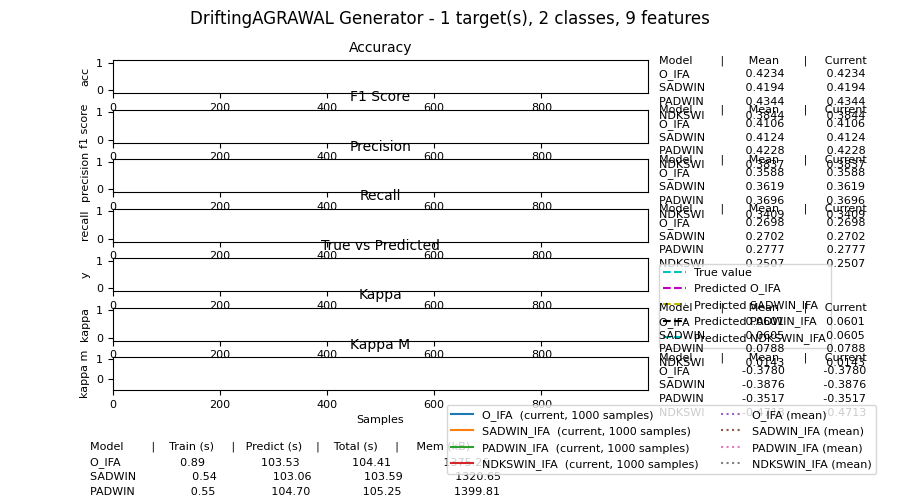

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [139.07s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ###############----- [75%] [277.38s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [417.54s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4234
O_IFA - Kappa        : 0.0601
O_IFA - Kappa M      : -0.3780
O_IFA - Precision: 0.3588
O_IFA - Recall: 0.2698
O_IFA - F1 score: 0.4106
O_IFA - Training time (s)  : 0.89
O_IFA - Testing time  (s)  : 103.53
O_IFA - Total time    (s)  : 104.41
O_IFA - Size (kB)          : 1375.2646
SADWIN_IFA - Accuracy     : 0.4194
SADWIN_IFA - Kappa        : 0.0605
SADWIN_IFA - Kappa M      : -0.3876
SADWIN_IFA - Precision: 0.3619
SADWIN_IFA - Recall: 0.2702
SADWIN_IFA - F1 score: 0.4124
SADWIN_IFA - Training time (s)  : 0.54
SADWIN_IFA - Testing time  (s)  : 103.06
SADWIN_IFA - Total time 

In [10]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 175, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()